# Mask CNN

In [2]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project

# Import Mask RCNN
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join("samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join("logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join("mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join("images")


class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

average_measures_dict = {
    'person' : [170, 45],
    'bicycle': [95, 165],
    'cat' : [24, 60],
    'dog' : [55, 100],
    'suitcase' : [67, 45],
    'sportsball' : [22, 22],
    'bottle' : [30, 8],
    'wine glass' : [15.3, 6.5],
    'cup' : [9.5, 8.3],
    'chair' : [47.5, 30, 30],
    'couch' : [90, 150, 80],
    'potted plant' : [25, 20],
    'bed' : [62.5, 91, 190],
    'dining table' : [72.5, 95, 120],
    'toilet' : [90, 75, 75],
    'tv' : [57.5, 117.5],
    'laptop' : [25, 27.5, 25],
    'cell phone' : [14, 7],
    'microwave' : [40, 74, 40],
    'sink' : [97.5, 62.5],
    'book' : [22.5, 15],
    'vase' : [29, 8],
}


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9

Processing 1 images
image                    shape: (910, 1366, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1366.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


-----------------------------------------------------------------
class				origin  	wid	hei
-----------------------------------------------------------------
bed 				 (158, 445) 	 824 	 429
potted plant 				 (990, 364) 	 155 	 185
chair 				 (971, 551) 	 173 	 220
vase 				 (1035, 484) 	 35 	 64
vase 				 (1038, 516) 	 48 	 48


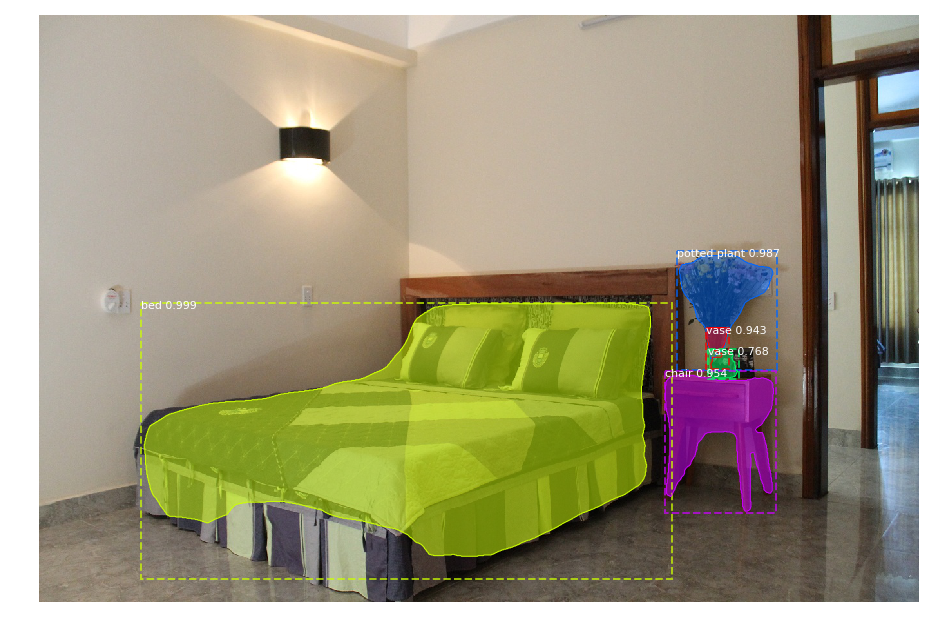

/Users/juliocesar/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: images/masked.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/juliocesar/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting uint32 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [4]:
import pickle

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'image4.jpg'))

# Run detection
results = model.detect([image], verbose=1)

print("\n\n-----------------------------------------------------------------")
print("class\t\t\t\torigin  \twid\thei")
print("-----------------------------------------------------------------")

# Visualize results
r = results[0]
measures_px, masked = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

skimage.io.imsave('images/masked.jpg', masked)
pickle.dump( measures_px, open( "measures.p", "wb" ) )

average_measures_dict = {
    'person' : [170, 45],
    'bicycle': [95, 165],
    'cat' : [24, 60],
    'dog' : [55, 100],
    'suitcase' : [67, 45],
    'sportsball' : [22, 22],
    'bottle' : [30, 8],
    'wine glass' : [15.3, 6.5],
    'cup' : [9.5, 8.3],
    'chair' : [47.5, 30, 30],
    'couch' : [90, 150, 80],
    'potted plant' : [25, 20],
    'bed' : [62.5, 91, 190],
    'dining table' : [72.5, 95, 120],
    'toilet' : [90, 75, 75],
    'tv' : [57.5, 117.5],
    'laptop' : [25, 27.5, 25],
    'cell phone' : [14, 7],
    'microwave' : [40, 74, 40],
    'sink' : [97.5, 62.5],
    'book' : [22.5, 15],
    'vase' : [29, 8],
}

pickle.dump( average_measures_dict, open( "real_measures.p", "wb" ) )

In [ ]:
print(measures_px)